# LOGISTIC REGRESSION

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [42]:
bank=pd.read_csv("bank-full.csv",';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [45]:
bank.shape

(45211, 17)

In [46]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [43]:
bank["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [44]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [47]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [49]:
bank.y.replace(to_replace=['no','yes'], value = [0,1],inplace = True)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [50]:
bank["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [51]:
bank = bank[['y','age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month','duration','campaign', 'pdays',
       'previous', 'poutcome']]

In [52]:
bank

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,0,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,0,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,0,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,1,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,1,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,0,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [53]:
bank1 = pd.get_dummies(bank,columns=['job', 'marital', 'education', 'default', 'housing','loan', 'contact','month', 'poutcome'])

In [54]:
bank1.head(10)

,y,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,2143,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,44,29,5,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,33,2,5,76,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,47,1506,5,92,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,33,1,5,198,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,0,35,231,5,139,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,0,28,447,5,217,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,0,42,2,5,380,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,58,121,5,50,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,0,43,593,5,55,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


# Visualisation
y -> Whether the client has subscribed a term deposit or not 

1.overall clients who has subscribed a term deposit or not

2.comparing age wise client who has subscribed a term deposit or not 

3.comparing job wise client who has subscribed a term deposit or not 

4.comparing martial wise client who has subscribed a term deposit or not 

5.comparing education wise client who has subscribed a term deposit or not

6.comparing default wise client who has subscribed a term deposit or not

7.comparing housing wise client who has subscribed a term deposit or not

8.comparing loan wise client who has subscribed a term deposit or not

9.comparing contact wise client who has subscribed a term deposit or not

<AxesSubplot:xlabel='y', ylabel='count'>

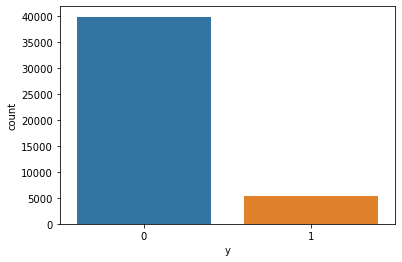

In [56]:
sns.countplot(x="y",data=bank)

<AxesSubplot:xlabel='age'>

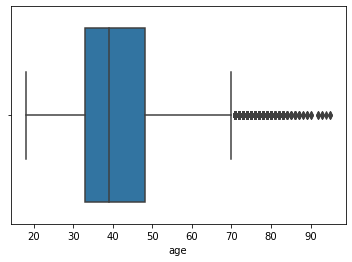

In [57]:
sns.boxplot(x="age",data=bank1,hue = 'y')

<AxesSubplot:xlabel='job', ylabel='count'>

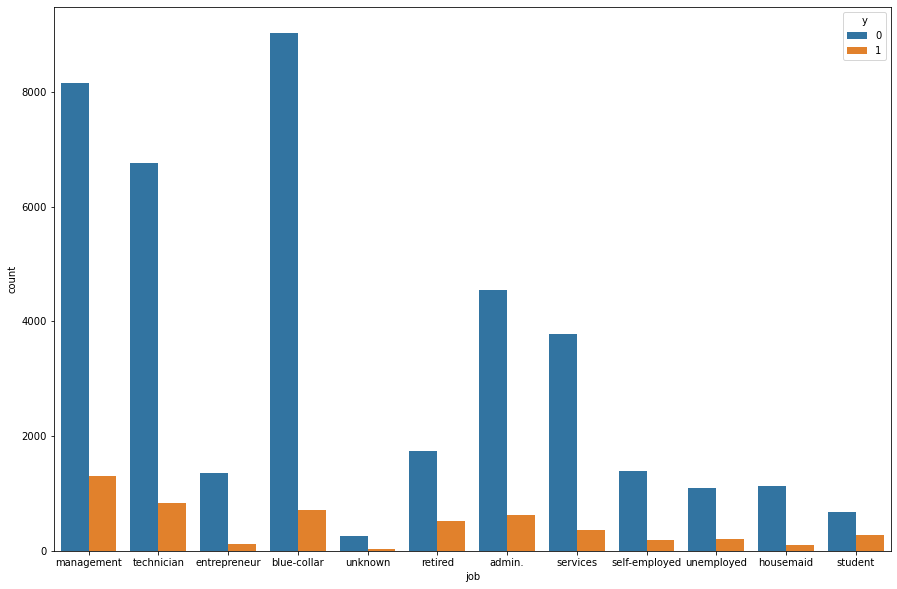

In [58]:
plt.figure(figsize=(15,10))
sns.countplot(x="job",data=bank,hue = 'y')

<AxesSubplot:xlabel='marital', ylabel='count'>

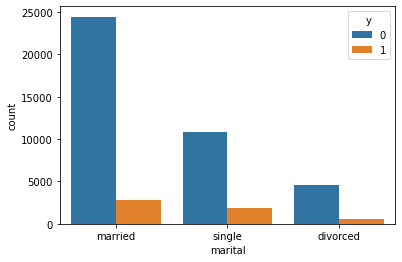

In [59]:
sns.countplot(x="marital",data=bank,hue = 'y')

<AxesSubplot:xlabel='education', ylabel='count'>

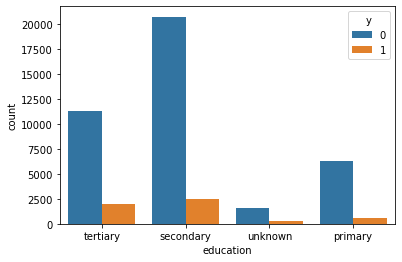

In [60]:
sns.countplot(x="education",data=bank,hue = 'y')

<AxesSubplot:xlabel='default', ylabel='count'>

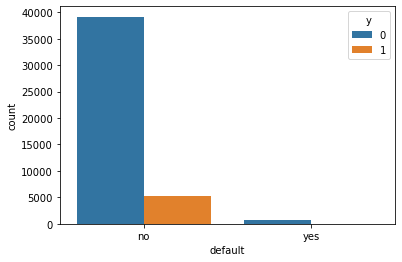

In [61]:
sns.countplot(x="default",data=bank,hue = 'y')

<AxesSubplot:xlabel='housing', ylabel='count'>

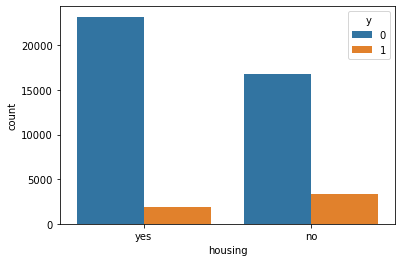

In [62]:
sns.countplot(x="housing",data=bank,hue = 'y')

<AxesSubplot:xlabel='loan', ylabel='count'>

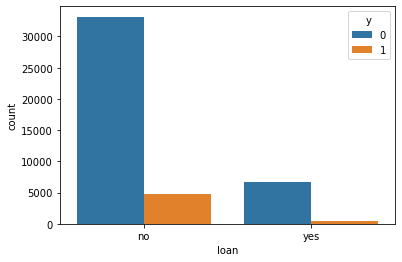

In [63]:
sns.countplot(x="loan",data=bank,hue = 'y')

<AxesSubplot:xlabel='contact', ylabel='count'>

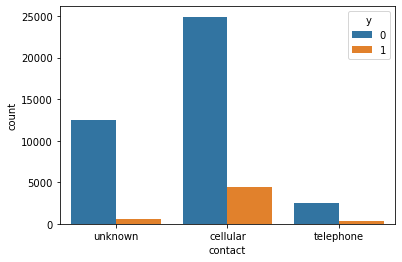

In [64]:
sns.countplot(x="contact",data=bank,hue = 'y')

# Building a Logistic Regression Model

In [65]:
#dividing data into target varibale and features
X = bank1.iloc[:,1::]
Y = bank1.iloc[:,0]

In [66]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [67]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [69]:
#Logistic Regression and fit the model
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [70]:
model.intercept_

array([-0.27833355])

In [71]:
np.round(model.coef_,2)

array([[-0.02,  0.  , -0.01,  0.  , -0.39,  0.  , -0.11, -0.03, -0.25,
        -0.03, -0.01,  0.01,  0.16, -0.02, -0.09,  0.03, -0.07,  0.  ,
         0.  ,  0.02, -0.17, -0.12, -0.07, -0.27,  0.05,  0.01, -0.26,
        -0.02,  0.36, -0.64, -0.08, -0.2 ,  0.09,  0.05, -0.42,  0.04,
         0.02,  0.03, -0.01, -0.01, -0.08, -0.06,  0.09, -0.4 , -0.06,
         0.1 ,  0.07, -0.13, -0.03,  0.31, -0.42]])

In [72]:
y_pred = model.predict(X)

In [73]:
y_pred_df = pd.DataFrame({'actual':Y,
                          'predicted_values':model.predict(X)})

In [74]:
y_pred_df

,actual,predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [75]:
y_pred_df["actual"].value_counts()

0    39922
1     5289
Name: actual, dtype: int64

In [76]:
y_pred_df["predicted_values"].value_counts()

0    43249
1     1962
Name: predicted_values, dtype: int64

In [77]:
#Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39142   780]
 [ 4107  1182]]


In [78]:
ac(Y,y_pred)

0.8919068368317444

In [79]:
#Classification Report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



# Prediction using Test and Train model

In [113]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=12)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11990
           1       0.60      0.23      0.33      1574

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [115]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [116]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [117]:
y_pred=model.predict(x_test)

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11990
           1       0.60      0.41      0.49      1574

    accuracy                           0.90     13564
   macro avg       0.76      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

